In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

# Charger les donnees

In [2]:
df=pd.read_csv('Superstore.csv', encoding='windows-1252')

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
df.shape

(9994, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

# Renommer les colonnes et supprimer les espaces

In [7]:
df.columns = map(str.lower, df.columns)
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.replace('-', '_')
df.head(2)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,postal_code,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


# Convertir les colonnes order_date et ship_date en type date

In [8]:
df[["order_date", "ship_date"]] = df[["order_date", "ship_date"]].apply(pd.to_datetime)

In [9]:
df.dtypes

row_id                    int64
order_id                 object
order_date       datetime64[ns]
ship_date        datetime64[ns]
ship_mode                object
customer_id              object
customer_name            object
segment                  object
country                  object
city                     object
state                    object
postal_code               int64
region                   object
product_id               object
category                 object
sub_category             object
product_name             object
sales                   float64
quantity                  int64
discount                float64
profit                  float64
dtype: object

# Chercher les doublons

In [10]:
df.duplicated().sum()

0

# Chercher les valeurs nulls

In [11]:
df.isnull().sum()

row_id           0
order_id         0
order_date       0
ship_date        0
ship_mode        0
customer_id      0
customer_name    0
segment          0
country          0
city             0
state            0
postal_code      0
region           0
product_id       0
category         0
sub_category     0
product_name     0
sales            0
quantity         0
discount         0
profit           0
dtype: int64

#Extraire mois,jour,annee depuis la colonne 'order_date'

In [12]:
df['month'] = df['order_date'].dt.month
df['year'] = df['order_date'].dt.year
df['day_of_week'] = df['order_date'].dt.day_of_week

In [13]:
df.head(1)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,category,sub_category,product_name,sales,quantity,discount,profit,month,year,day_of_week
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,11,2016,1


# Afficher les ventes par mois

In [14]:
ventes_par_mois = df.groupby('month')['sales'].sum().reset_index()
ventes_par_mois

,month,sales
0,1,94924.8356
1,2,59751.2514
2,3,205005.4888
3,4,137762.1286
4,5,155028.8117
5,6,152718.6793
6,7,147238.0970
7,8,159044.0630
8,9,307649.9457
9,10,200322.9847


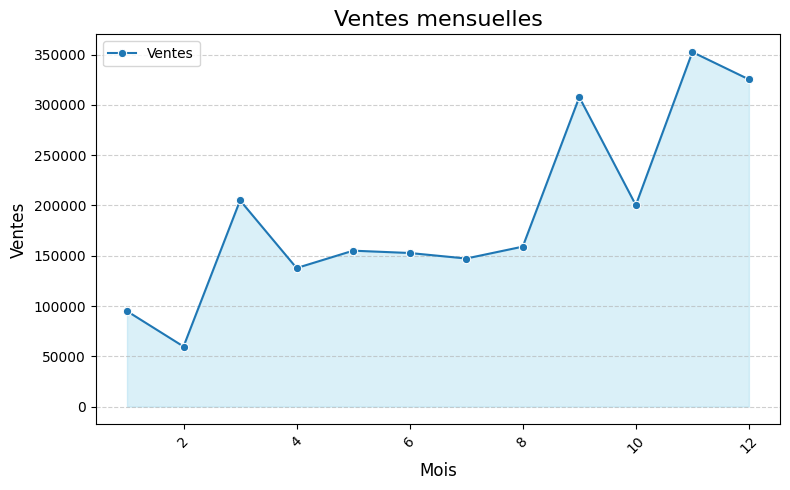

In [32]:
plt.figure(figsize=(8, 5))
sns.lineplot(data=ventes_par_mois,x='month',y='sales',marker='o',label='Ventes')
plt.fill_between(ventes_par_mois['month'], ventes_par_mois['sales'], alpha=0.3, color='skyblue')

plt.title('Ventes mensuelles', fontsize=16)
plt.xlabel('Mois', fontsize=12)
plt.ylabel('Ventes', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# Analyser les ventes en fonction des catégories de produits

In [16]:
categorie_produit=df.groupby('category')['sales'].sum().reset_index()
categorie_produit

,category,sales
0,Furniture,741999.7953
1,Office Supplies,719047.0320
2,Technology,836154.0330


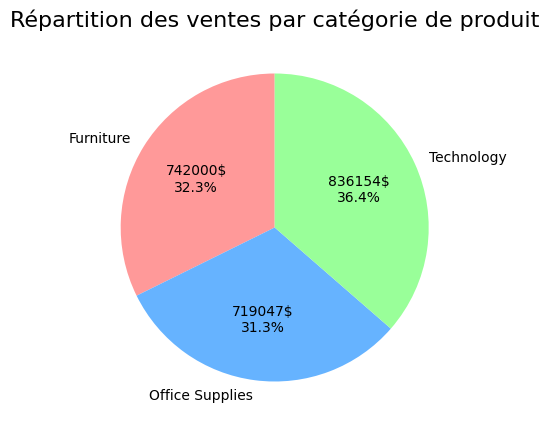

In [17]:
plt.figure(figsize=(5,5))
wedges, texts, autotexts = plt.pie(
    categorie_produit['sales'],
    labels=categorie_produit['category'],
    autopct=lambda pct: f"{int(round(pct * categorie_produit['sales'].sum() / 100))}$\n{pct:.1f}%",
    startangle=90,
    textprops={'fontsize': 10},
    colors=['#ff9999', '#66b3ff', '#99ff99']
)
plt.title('Répartition des ventes par catégorie de produit', fontsize=16)
#plt.tight_layout()
plt.show()

# Analyser les ventes en fonction des sous catégories de produits

In [18]:
sub_categorie_produit=df.groupby('sub_category')['sales'].sum().reset_index()
sub_categorie_produit

,sub_category,sales
0,Accessories,167380.3180
1,Appliances,107532.1610
2,Art,27118.7920
3,Binders,203412.7330
4,Bookcases,114879.9963
5,Chairs,328449.1030
6,Copiers,149528.0300
7,Envelopes,16476.4020
8,Fasteners,3024.2800
9,Furnishings,91705.1640


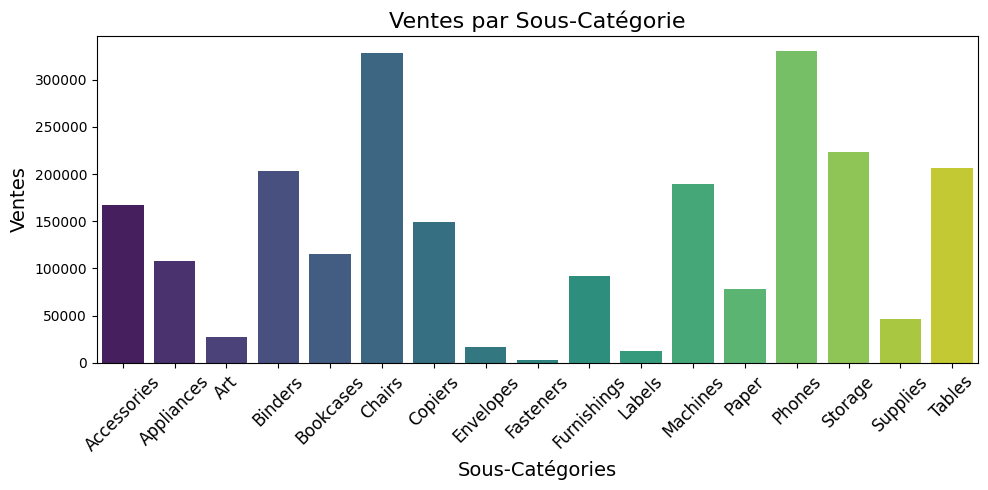

In [19]:
# Création du graphique à barres
plt.figure(figsize=(10, 5))
sns.barplot(x='sub_category', y='sales', data=sub_categorie_produit, palette='viridis')

# Personnalisation
plt.title('Ventes par Sous-Catégorie', fontsize=16)
plt.xlabel('Sous-Catégories', fontsize=14)
plt.ylabel('Ventes', fontsize=14)
plt.xticks(rotation=45, fontsize=12)

# Affichage
plt.tight_layout()
plt.show()

# Calculer le profit mensuel 

In [20]:
profit_mensuel=df.groupby('month')['profit'].sum().reset_index()
profit_mensuel

,month,profit
0,1,9134.4461
1,2,10294.6107
2,3,28594.6872
3,4,11587.4363
4,5,22411.3078
5,6,21285.7954
6,7,13832.6648
7,8,21776.9384
8,9,36857.4753
9,10,31784.0413


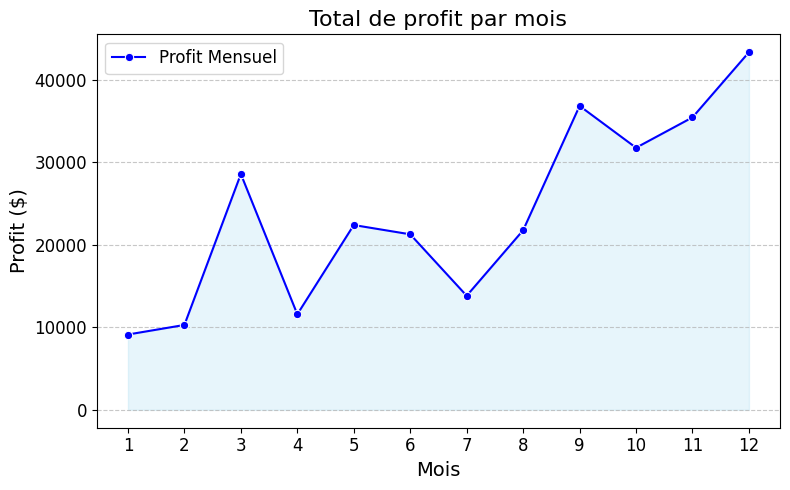

In [31]:
plt.figure(figsize=(8, 5))

sns.lineplot(x='month', y='profit', data=profit_mensuel, marker='o', label='Profit Mensuel', color='blue')
plt.fill_between(profit_mensuel['month'], profit_mensuel['profit'],  color='skyblue',  alpha=0.2)
plt.xticks(ticks=profit_mensuel['month'], labels=profit_mensuel['month'], fontsize=12)
plt.title('Total de profit par mois', fontsize=16)
plt.xlabel('Mois', fontsize=14)
plt.ylabel('Profit ($)', fontsize=14)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# Profit par catégorie et par sous-catégorie

In [22]:
profit_par_categorie=df.groupby('category')['profit'].sum().reset_index()
profit_par_categorie

,category,profit
0,Furniture,18451.2728
1,Office Supplies,122490.8008
2,Technology,145454.9481


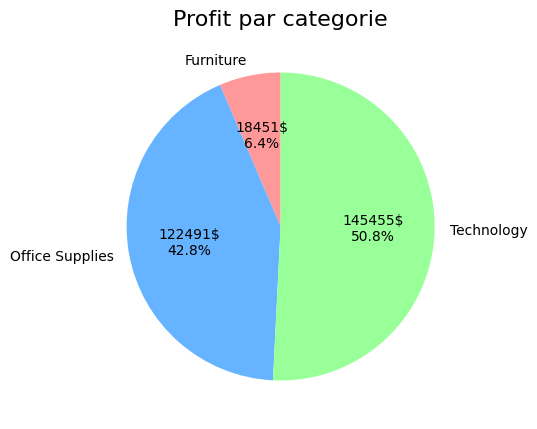

In [23]:
plt.figure(figsize=(5,5))
wedges, texts, autotexts = plt.pie(
    profit_par_categorie['profit'],
    labels=profit_par_categorie['category'],
    autopct=lambda pct: f"{int(round(pct * profit_par_categorie['profit'].sum() / 100))}$\n{pct:.1f}%",
    startangle=90,
    textprops={'fontsize': 10},
    colors=['#ff9999', '#66b3ff', '#99ff99']
)
plt.title('Profit par categorie', fontsize=16)
#plt.tight_layout()
plt.show()

In [24]:
profit_par_sous_categorie=df.groupby('sub_category')['profit'].sum().reset_index()
profit_par_sous_categorie

,sub_category,profit
0,Accessories,41936.6357
1,Appliances,18138.0054
2,Art,6527.7870
3,Binders,30221.7633
4,Bookcases,-3472.5560
5,Chairs,26590.1663
6,Copiers,55617.8249
7,Envelopes,6964.1767
8,Fasteners,949.5182
9,Furnishings,13059.1436


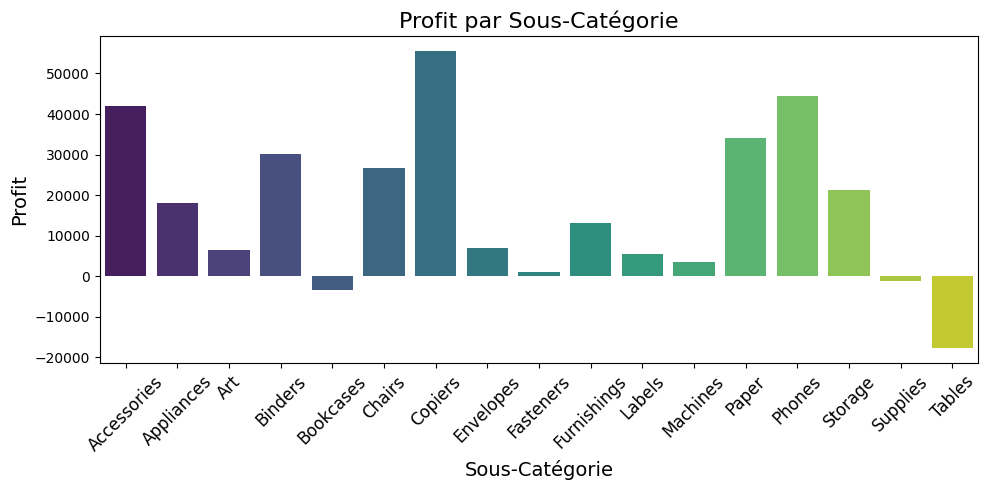

In [25]:
plt.figure(figsize=(10, 5))
sns.barplot(x='sub_category', y='profit', data=profit_par_sous_categorie, palette='viridis')

plt.title('Profit par Sous-Catégorie', fontsize=16)
plt.xlabel('Sous-Catégorie', fontsize=14)
plt.ylabel('Profit', fontsize=14)
plt.xticks(rotation=45, fontsize=12)

plt.tight_layout()
plt.show()

In [26]:
df.head(3)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,category,sub_category,product_name,sales,quantity,discount,profit,month,year,day_of_week
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,11,2016,1
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,11,2016,1
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714,6,2016,6


# Analyser les ventes et les profits par segments de clients

In [27]:
ventes_profit_par_segments_clients=df.groupby('segment').agg({'sales':'sum','profit':'sum'}).reset_index()
ventes_profit_par_segments_clients


,segment,sales,profit
0,Consumer,1.161401e+06,134119.2092
1,Corporate,7.061464e+05,91979.1340
2,Home Office,4.296531e+05,60298.6785


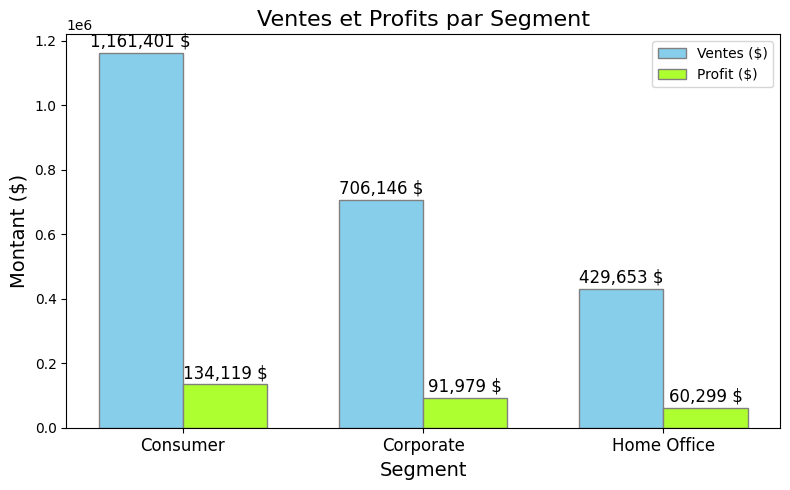

In [30]:
ventes_profit_par_segments_clients=df.groupby('segment').agg({'sales':'sum','profit':'sum'}).reset_index()
bar_width = 0.35
r1 = np.arange(len(ventes_profit_par_segments_clients))
r2 = [x + bar_width for x in r1]

plt.figure(figsize=(8, 5))
plt.bar(r1, ventes_profit_par_segments_clients['sales'], color='skyblue', width=bar_width, edgecolor='grey', label='Ventes ($)')
plt.bar(r2, ventes_profit_par_segments_clients['profit'], color='greenyellow', width=bar_width, edgecolor='grey', label='Profit ($)')

plt.xlabel('Segment', fontsize=14)
plt.ylabel('Montant ($)', fontsize=14)
plt.title('Ventes et Profits par Segment', fontsize=16)

plt.xticks([r + bar_width / 2 for r in r1], ventes_profit_par_segments_clients['segment'], fontsize=12)

for i in range(len(ventes_profit_par_segments_clients)):
    plt.text(r1[i], ventes_profit_par_segments_clients['sales'][i] + 20000, f'{ventes_profit_par_segments_clients["sales"][i]:,.0f} $', ha='center', fontsize=12)
    plt.text(r2[i], ventes_profit_par_segments_clients['profit'][i] + 20000, f'{ventes_profit_par_segments_clients["profit"][i]:,.0f} $', ha='center', fontsize=12)

plt.legend()
plt.tight_layout()
plt.show()